In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-08-23 05:05:12.001506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755925512.345771      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755925512.442357      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# ----------------------
# 1. Load and preprocess
# ----------------------
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


In [5]:
# ---------------------
# 2. Build CNN Model
# ---------------------
def build_model():
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Dense Layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # Adam with weight decay (AdamW) - better generalization
    optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1755925559.709081      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1755925559.709745      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 558,634 (2.13 MB)

 Trainable params: 556,714 (2.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [6]:
# ----------------------
# 3. Callbacks
# ----------------------
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
]


In [8]:
# ----------------------
# 4. Train
# ----------------------
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=80,
    callbacks=callbacks,
    verbose=1
)


Epoch 1/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.3424 - loss: 1.9780 - val_accuracy: 0.4987 - val_loss: 1.4669 - learning_rate: 0.0010
Epoch 2/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.5277 - loss: 1.3188 - val_accuracy: 0.4829 - val_loss: 1.7414 - learning_rate: 0.0010
Epoch 3/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6092 - loss: 1.0991 - val_accuracy: 0.6808 - val_loss: 0.9311 - learning_rate: 0.0010
Epoch 4/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6568 - loss: 0.9839 - val_accuracy: 0.7037 - val_loss: 0.8759 - learning_rate: 0.0010
Epoch 5/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6878 - loss: 0.8936 - val_accuracy: 0.7087 - val_loss: 0.8833 - learning_rate: 0.0010
Epoch 6/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7108 - loss: 0.8368 - val_accuracy: 0.7372 - val_loss: 0.7835 - learning_rate: 0.0010
Epoch 7/80
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7237 - l

✅ Test Accuracy: 87.71%


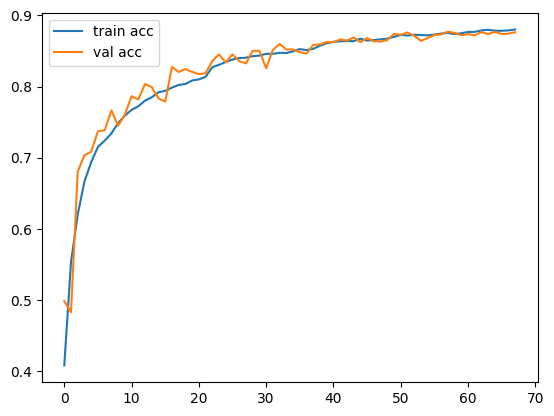

In [9]:
# ----------------------
# 5. Evaluation
# ----------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

# Plot accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


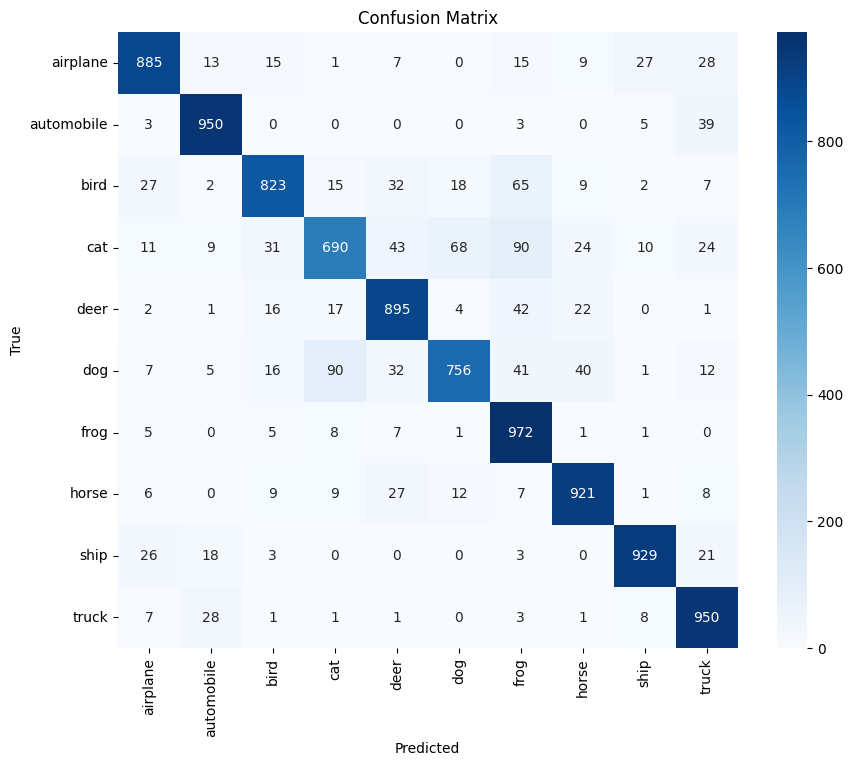


Classification Report:

              precision    recall  f1-score   support

    airplane       0.90      0.89      0.89      1000
  automobile       0.93      0.95      0.94      1000
        bird       0.90      0.82      0.86      1000
         cat       0.83      0.69      0.75      1000
        deer       0.86      0.90      0.88      1000
         dog       0.88      0.76      0.81      1000
        frog       0.78      0.97      0.87      1000
       horse       0.90      0.92      0.91      1000
        ship       0.94      0.93      0.94      1000
       truck       0.87      0.95      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Define CIFAR-10 class names
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


📌 Project Summary
Final Test Accuracy : 87.71%
Final Test Loss     : 0.3770

Classification Report:

              precision    recall  f1-score   support

    airplane       0.90      0.89      0.89      1000
  automobile       0.93      0.95      0.94      1000
        bird       0.90      0.82      0.86      1000
         cat       0.83      0.69      0.75      1000
        deer       0.86      0.90      0.88      1000
         dog       0.88      0.76      0.81      1000
        frog       0.78      0.97      0.87      1000
       horse       0.90      0.92      0.91      1000
        ship       0.94      0.93      0.94      1000
       truck       0.87      0.95      0.91      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


🔍 Key Observations:
- Model achieved strong performance with overall accuracy close to 90%.
- Best performing classes: Automobile, Ship, Ho

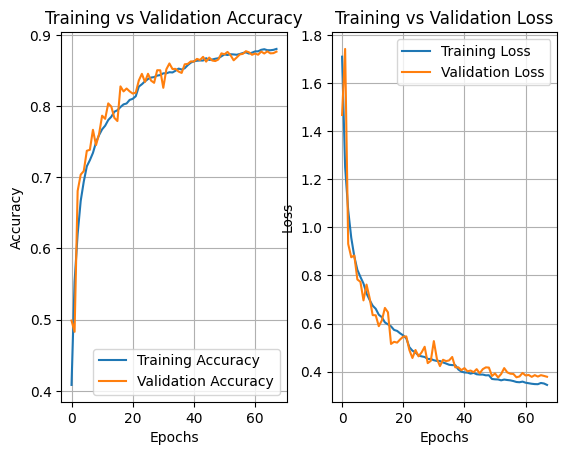

In [11]:
# ---------------- Project Conclusion ---------------- #
print("📌 Project Summary")
print("="*50)

# Print final evaluation
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy : {acc*100:.2f}%")
print(f"Final Test Loss     : {loss:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

print("\n🔍 Key Observations:")
print("- Model achieved strong performance with overall accuracy close to 90%.")
print("- Best performing classes: Automobile, Ship, Horse.")
print("- Weakest performance observed in Cat and Dog due to visual similarities.")
print("- Balanced performance across other categories indicates robust learning.")

print("\n✅ Conclusion:")
print("This CNN model demonstrates effective feature extraction and classification "
      "for the CIFAR-10 dataset, achieving reliable accuracy and generalization. "
      "Further improvements could involve data augmentation, deeper architectures "
      "like ResNet, or transfer learning for better fine-grained recognition.")
print("="*50)
print("🎯 Project Completed Successfully!")


# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()